# Use DESI Legacy Survey photo z



In [1]:
import pandas as pd
from astropy.table import Table, Column, vstack
from astropy.cosmology import Planck15
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import urllib.request, json 

import time
import numpy as np
import pyvo as vo
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt

from selenium import webdriver

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot
from herschelhelp.utils import clean_table

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## 2. Cross match to desi-photoz objects

In [2]:
cross_query = """
SELECT
    db.ID,
    db.RA,
    db.DEC,
    db.field,
    db.photo_z,
    db.photo_zerr
FROM desi_photoz.main AS db
WHERE db.field = 'XMM-13hr'
"""

# construct a service; I’ve taken the URL from TOPCAT’s
# TAP service browser # ("Selected TAP Service" near the
# foot of the dialog)
service = vo.dal.TAPService(
    "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap"
)

In [3]:
job = service.submit_job(cross_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} running after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
desi_photoz = result.table

Job COMPLETED running after 6 seconds.


In [4]:
desi_photoz = clean_table(desi_photoz)

Converting column id type from object to string
Converting column field type from object to string


In [5]:
desi_photoz.write('./data/XMM-13hr_DESI-DR7_Zou_et_al_2019_photo_z.fits', overwrite=True)

In [6]:
desi_photoz

id,ra,dec,field,photo_z,photo_zerr
,deg,deg,,,
str16,float64,float64,str8,float64,float64
6000532357000924,203.414603489769,37.4249329045831,XMM-13hr,0.76192415,0.045515098
6000532357001601,203.296380805966,37.4726204907544,XMM-13hr,0.45275033,0.055123646
6000532357001430,203.326374582613,37.4602495783935,XMM-13hr,0.5451529,0.09063682
6000532357001545,203.314389478209,37.4684086846553,XMM-13hr,0.52448136,0.08827563
6000532357001647,203.312561688182,37.4762025008145,XMM-13hr,0.83615017,0.06793477
6000532357001515,203.331873803064,37.466077431809,XMM-13hr,0.43908644,0.096729465
6000532357001522,203.345403821136,37.4668090321231,XMM-13hr,0.34978685,0.028658831
6000532357001777,203.297080706917,37.4879664964307,XMM-13hr,0.69910824,0.05794524


In [7]:
ml = Table.read('../../dmu1/dmu1_ml_XMM-13hr/data/master_catalogue_xmm-13hr_20180501.fits')

In [8]:
ml

help_id,field,ra,dec,hp_idx,f_ap_ukidss_j,ferr_ap_ukidss_j,m_ap_ukidss_j,merr_ap_ukidss_j,f_ukidss_j,ferr_ukidss_j,m_ukidss_j,merr_ukidss_j,flag_ukidss_j,f_ap_90prime_g,ferr_ap_90prime_g,m_ap_90prime_g,merr_ap_90prime_g,f_90prime_g,ferr_90prime_g,m_90prime_g,merr_90prime_g,flag_90prime_g,f_ap_90prime_r,ferr_ap_90prime_r,m_ap_90prime_r,merr_ap_90prime_r,f_90prime_r,ferr_90prime_r,m_90prime_r,merr_90prime_r,flag_90prime_r,f_ap_mosaic_z,ferr_ap_mosaic_z,m_ap_mosaic_z,merr_ap_mosaic_z,f_mosaic_z,ferr_mosaic_z,m_mosaic_z,merr_mosaic_z,flag_mosaic_z,stellarity,stellarity_origin,flag_cleaned,flag_merged,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,zspec_association_flag,zspec_qual,zspec
,,deg,deg,,,,,,,,,,,,,,,uJy,uJy,,,,,,,,uJy,uJy,,,,,,,,uJy,uJy,,,,,,,,,,,,,,
bytes27,bytes18,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bytes20,bool,bool,int64,int64,int64,float64,bool,int64,float64
HELP_J133432.222+373646.113,XMM-13hr,203.63425709565024,37.61280916481453,171772665,177992.81,66.08496,10.7739935,0.00040311087,562554.7,116.882126,9.524588,0.00022558367,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,3,3,0,0.0045801841620858935,False,-99,nan
HELP_J133414.713+375131.803,XMM-13hr,203.56130245753093,37.85883425125814,171779021,162576.17,62.979897,10.872357,0.0004206001,234041.06,76.57976,10.476769,0.00035525995,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,3,3,0,0.005854426578631392,False,-99,nan
HELP_J133533.957+374210.516,XMM-13hr,203.89148663495547,37.7029211577961,171773176,121901.445,53.248684,11.184978,0.0004742686,330527.34,89.55556,10.101981,0.0002941775,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,2,3,0,0.005765494380787224,False,-99,nan
HELP_J133533.920+374208.261,XMM-13hr,203.89133445070576,37.70229471038029,171773176,94324.53,46.931934,11.463438,0.00054021686,113880.55,52.70391,11.258876,0.0005024787,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,0,3,0,0.005756887064081255,False,-99,nan
HELP_J133405.537+373812.340,XMM-13hr,203.5230723959791,37.63676123029062,171778200,92564.48,47.4294,11.483889,0.0005563238,764563.06,135.65337,9.191466,0.00019263782,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,3,3,0,0.004791692193670998,False,-99,nan
HELP_J133507.395+381823.079,XMM-13hr,203.78081290015865,38.306410855834955,171784603,76208.625,43.00891,11.694989,0.0006127433,60405.227,40.613148,11.947313,0.0007299892,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,2,3,0,0.005256923912719652,False,-99,nan
HELP_J133507.495+381821.978,XMM-13hr,203.7812287942033,38.30610503761026,171784603,63930.758,39.45619,11.885725,0.0006700845,175108.0,71.86561,10.791735,0.00044559414,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,2,3,0,0.005255860575460749,False,-99,nan
HELP_J133404.940+382430.467,XMM-13hr,203.5205814885502,38.40846317562754,171806897,44149.688,32.27779,12.287681,0.00079378067,44388.742,35.061363,12.281817,0.00085759116,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,Fal

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


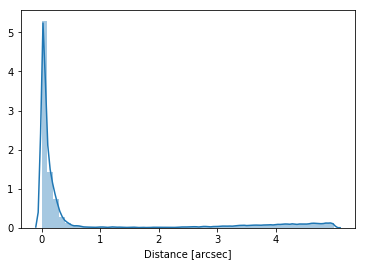

In [9]:
nb_merge_dist_plot(
    SkyCoord(ml['ra'], ml['dec']),
    SkyCoord(desi_photoz['ra'], desi_photoz['dec'])
)

In [10]:
# Given the graph above, we use 0.8 arc-second radius
desi_photoz['ra'].name = 'desi_ra'
desi_photoz['dec'].name = 'desi_dec'
photoz = merge_catalogues(ml, desi_photoz, "desi_ra", "desi_dec", radius=0.8*u.arcsec)

In [11]:
photoz['help_id'].fill_value = ''
photoz['photo_z'].fill_value = np.nan
photoz = photoz.filled()
has_help = photoz['help_id'] != ''
has_z = ~np.isnan(photoz['photo_z'])
photoz = photoz['help_id', 'id', 'photo_z', 'photo_zerr']
photoz[has_help & has_z].write('./data/XMM-13hr_DESI-DR7_Zou_et_al_2019_photo_z_withhelp_id.fits', overwrite=True)

In [12]:
photoz[has_help & has_z]

help_id,id,photo_z,photo_zerr
bytes27,str16,float64,float64
HELP_J133518.272+375026.194,6000533502003569,0.44973215,0.034033563
HELP_J133442.543+380003.910,6000534641001979,0.45776433,0.13827044
HELP_J133540.548+375155.502,6000533502003948,0.49301365,0.055531282
HELP_J133337.552+380417.817,6000534640002921,0.40855777,0.091790274
HELP_J133636.314+374336.560,6000533503001459,0.28748626,0.06836981
HELP_J133401.565+380140.968,6000534641002309,0.7450893,0.054091707
HELP_J133554.907+375940.362,6000534642001811,0.6666842,0.044908088
HELP_J133437.014+380749.950,6000535777000109,0.67369443,0.0627994
HELP_J133420.648+382021.620,6000535777002848,0.7417847,0.05852794
